<!DOCTYPE html>
<html>
  <head>
    <style>
      /* CSS styles for formatting and layout */
      h1 {
        text-align: center;
        font-size: 2em;
      }
      p {
        text-align: justify;
        font-size: 1.2em;
        line-height: 1.5em;
        margin: 1em;
      }
      img {
        display: block;
        margin: 0 auto;
        width: 50%;
      }
    </style>
  </head>
  <body>
    <h1>Intrusion Detection on Internet of Vehicles by Federated Learning </h1>
    <h4>Abhishek Sebastian and Pragna R</h4>
    <p>Federated Learning is a method of training machine learning models in which data is distributed across multiple devices or locations, rather than being centralized in a single location. Each device, or "edge" device, trains a local version of the model using its own data, and then periodically sends updates to a central server, which aggregates the updates to improve the overall model. </p>
    <img src="https://theblue.ai/wp-content/uploads/2019/09/Illustration_Data-owner-1.jpg" alt="Federated Learning diagram">
    <p>This allows for models to be trained on a much larger and more diverse dataset, and also helps to protect the privacy of users by keeping their data on their own devices.</p>
  </body>
</html>


---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip3 install catboost
import catboost as cbt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.0 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score, f1_score

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pickle

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import numpy as np


### Importing dataset : CICIDS2017

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/ISM/Intrusion-Detection-System-Using-Machine-Learning-main/data/CICIDS2017_sample_km.csv")
df.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,5.416666e-07,0.0,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,5.416666e-07,0.0,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,4.416666e-07,0.0,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,7.499999e-07,0.0,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,7.249999e-07,0.0,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### Dividing the dataset into three parts.


> The data set is divided into three equal parts to simulate individial data from users. 




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/ISM/Intrusion-Detection-System-Using-Machine-Learning-main/data/CICIDS2017_sample.csv")
df = df.dropna()
df.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4,2,0,37,0,31,6,18.500000,17.677670,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,142377,46,62,1325,105855,570,0,28.804348,111.407285,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,118873,23,28,1169,45025,570,0,50.826087,156.137367,2896,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,143577,43,55,1301,107289,570,0,30.255814,115.178969,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,143745,49,59,1331,110185,570,0,27.163265,108.067176,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


Now, We are Taking only the needed Features Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Std', 'Fwd Packet Length Mean' and 'Flow Duration'.

In [ ]:
df=df[['Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Std', 'Fwd Packet Length Mean', 'Flow Duration', 'Label']]
df = df[df['Label']!=' ']
df.dropna()
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Divide the data into three parts
X = df.drop('Label', axis=1)
y = df['Label']

Label Count Before SMOTE Analysis.

In [ ]:
df.Label.value_counts()

BENIGN          22728
DoS             18984
PortScan         7946
BruteForce       2767
WebAttack        2180
Bot              1966
Infiltration       36
Name: Label, dtype: int64

Performing SMOTE Analysis

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={"Infiltration":20000,"PortScan":20000,"BruteForce":20000,"WebAttack":20000,"Bot":20000})

In [ ]:
X, y = smote.fit_resample(X, y)

Label Count AFTER SMOTE Analysis.

In [ ]:
pd.Series(y).value_counts()

BENIGN          22728
PortScan        20000
Bot             20000
Infiltration    20000
WebAttack       20000
BruteForce      20000
DoS             18984
Name: Label, dtype: int64

In [ ]:
df.isnull().any()

Total Length of Fwd Packets    False
Total Length of Bwd Packets    False
Fwd Packet Length Std          False
Fwd Packet Length Mean         False
Flow Duration                  False
Label                          False
dtype: bool

Outlier Detection and Removal using Isolation Forest Classifier

In [ ]:
from sklearn.ensemble import IsolationForest

# fit the model
clf = IsolationForest(max_samples=100, random_state=42, contamination=0.1)
clf.fit(X)

# get the outlier indices
outlier_indices = clf.predict(X)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
# remove the outliers
X = X[outlier_indices == 1]
y = y[outlier_indices == 1]

Label Count AFTER Outliers Removal.

In [ ]:
pd.Series(y).value_counts()

BENIGN          20884
PortScan        20000
BruteForce      20000
Bot             19424
WebAttack       19124
DoS             18747
Infiltration     9361
Name: Label, dtype: int64

Dividing the data set into three equal parts ( For ED1 , ED2 and CS)

In [ ]:
X_edge1, X_edge2, y_edge1, y_edge2 = train_test_split(X, y, test_size=0.33, random_state=42)
X_central, X_edge2, y_central, y_edge2 = train_test_split(X_edge2, y_edge2, test_size=0.50, random_state=42)

### Virtual Edge Machines:
A virtual edge machine is a virtualized version of an edge device that is used in federated learning. It simulates the behavior of an actual edge device, such as a smartphone or an IoT sensor, in a controlled environment. It allows researchers and engineers to test and develop federated learning models without the need for actual physical devices.

> Virtual edge machine 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

0:	learn: 1.2219650	total: 56.9ms	remaining: 2.79s
1:	learn: 0.8954846	total: 115ms	remaining: 2.76s
2:	learn: 0.7169847	total: 157ms	remaining: 2.46s
3:	learn: 0.5992696	total: 214ms	remaining: 2.46s
4:	learn: 0.5297093	total: 281ms	remaining: 2.53s
5:	learn: 0.4743610	total: 389ms	remaining: 2.85s
6:	learn: 0.4477324	total: 454ms	remaining: 2.79s
7:	learn: 0.4087198	total: 522ms	remaining: 2.74s
8:	learn: 0.3863290	total: 583ms	remaining: 2.65s
9:	learn: 0.3532995	total: 674ms	remaining: 2.69s
10:	learn: 0.3306866	total: 746ms	remaining: 2.65s
11:	learn: 0.3230157	total: 798ms	remaining: 2.53s
12:	learn: 0.3000526	total: 886ms	remaining: 2.52s
13:	learn: 0.2867211	total: 951ms	remaining: 2.44s
14:	learn: 0.2750537	total: 1.02s	remaining: 2.38s
15:	learn: 0.2694295	total: 1.08s	remaining: 2.29s
16:	learn: 0.2594538	total: 1.18s	remaining: 2.29s
17:	learn: 0.2539554	total: 1.26s	remaining: 2.23s
18:	learn: 0.2480590	total: 1.33s	remaining: 2.17s
19:	learn: 0.2431503	total: 1.4s	remaini

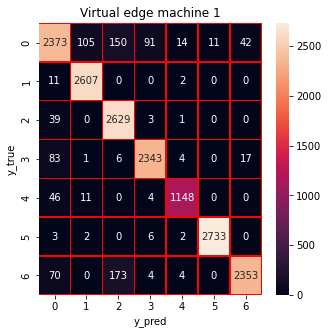

In [ ]:
# Split the data into a training and test set for edge1 dataset
X_train_edge1, X_test_edge1, y_train_edge1, y_test_edge1 = train_test_split(X_edge1, y_edge1, test_size=0.2)
y_train_edge1 = y_train_edge1.ravel()
y_test_edge1 = y_test_edge1.ravel()


# Train a local model using the training data
model = cbt.CatBoostClassifier(depth =3 ,iterations=50, learning_rate=0.5)
model.fit(X_train_edge1, y_train_edge1)

# Predict test set results
y_pred_edge1 = model.predict(X_test_edge1)

# create and print the confusion matrix
conf_matrix_edge1 = confusion_matrix(y_test_edge1, y_pred_edge1)
print("Confusion matrix for Edge Device 1:\n", conf_matrix_edge1)

# Save the model as a pickle file
with open('local_model_edge1.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge1,y_pred_edge1))
normal_edge1_acc  = accuracy_score(y_test_edge1, y_pred_edge1)
cm=confusion_matrix(y_test_edge1,y_pred_edge1)
f,ax=plt.subplots(figsize=(5,5))

sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Virtual edge machine 1")
plt.show()



> 



Streaming output truncated to the last 5000 lines.
174:	learn: 0.1297373	total: 4.73s	remaining: 676ms
175:	learn: 0.1295039	total: 4.75s	remaining: 648ms
176:	learn: 0.1291260	total: 4.78s	remaining: 621ms
177:	learn: 0.1290351	total: 4.81s	remaining: 594ms
178:	learn: 0.1288664	total: 4.84s	remaining: 567ms
179:	learn: 0.1284999	total: 4.87s	remaining: 541ms
180:	learn: 0.1283837	total: 4.89s	remaining: 514ms
181:	learn: 0.1282653	total: 4.92s	remaining: 486ms
182:	learn: 0.1281186	total: 4.94s	remaining: 459ms
183:	learn: 0.1279950	total: 4.97s	remaining: 432ms
184:	learn: 0.1277122	total: 4.99s	remaining: 405ms
185:	learn: 0.1275874	total: 5.03s	remaining: 378ms
186:	learn: 0.1274728	total: 5.05s	remaining: 351ms
187:	learn: 0.1273042	total: 5.08s	remaining: 324ms
188:	learn: 0.1271528	total: 5.1s	remaining: 297ms
189:	learn: 0.1270426	total: 5.13s	remaining: 270ms
190:	learn: 0.1269283	total: 5.16s	remaining: 243ms
191:	learn: 0.1267705	total: 5.18s	remaining: 216ms
192:	learn: 0.

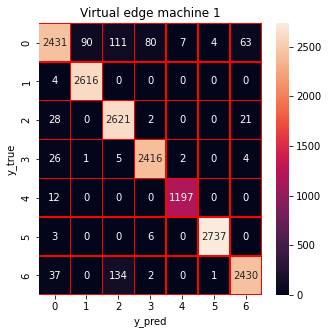

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import seaborn as sns
import matplotlib.pyplot as plt



# Create a CatBoostClassifier
model = CatBoostClassifier()

# Define the grid of hyperparameters to search
param_grid = {'depth': [3, 4, 5, 6, 7],
              'iterations': [50, 100, 200],
              'learning_rate': [0.1, 0.5, 1]}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=3)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_edge1,y_train_edge1)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Get the best estimator
best_model = grid_search.best_estimator_

# Predict test set results
y_pred_edge1 = best_model.predict(X_test_edge1)

# create and print the confusion matrix
conf_matrix_edge1 = confusion_matrix(y_test_edge1, y_pred_edge1)
print("Confusion matrix for Edge Device 1:\n", conf_matrix_edge1)

# Save the model as a pickle file
with open('advanced_local_model_edge1.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge1,y_pred_edge1))
edge1_acc  = accuracy_score(y_test_edge1, y_pred_edge1)
cm=confusion_matrix(y_test_edge1,y_pred_edge1)
f,ax=plt.subplots(figsize=(5,5))

sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Virtual edge machine 1")
plt.show()

In [ ]:
#Compare the accuracy of the three systems
print("Accuracy of Normal Edge 1: ", normal_edge1_acc)
print("Accuracy of Hyper Parameter tuned Edge 1: ", edge1_acc)

Accuracy of Normal Edge 1:  0.9470481539991809
Accuracy of Hyper Parameter tuned Edge 1:  0.9623778596922357


> Virtual edge machine 2

0:	learn: 0.6991183	total: 14.1ms	remaining: 690ms
1:	learn: 0.5133915	total: 27.6ms	remaining: 662ms
2:	learn: 0.3994156	total: 40.6ms	remaining: 636ms
3:	learn: 0.3327047	total: 53.5ms	remaining: 615ms
4:	learn: 0.2841978	total: 66.8ms	remaining: 601ms
5:	learn: 0.2656473	total: 78.6ms	remaining: 577ms
6:	learn: 0.2432274	total: 91.5ms	remaining: 562ms
7:	learn: 0.2309701	total: 104ms	remaining: 544ms
8:	learn: 0.2163864	total: 119ms	remaining: 541ms
9:	learn: 0.2037570	total: 134ms	remaining: 535ms
10:	learn: 0.1979818	total: 146ms	remaining: 518ms
11:	learn: 0.1938204	total: 159ms	remaining: 502ms
12:	learn: 0.1903126	total: 171ms	remaining: 488ms
13:	learn: 0.1867791	total: 184ms	remaining: 472ms
14:	learn: 0.1822454	total: 196ms	remaining: 457ms
15:	learn: 0.1794970	total: 208ms	remaining: 443ms
16:	learn: 0.1684335	total: 229ms	remaining: 444ms
17:	learn: 0.1623425	total: 243ms	remaining: 433ms
18:	learn: 0.1596704	total: 257ms	remaining: 419ms
19:	learn: 0.1564228	total: 272ms	

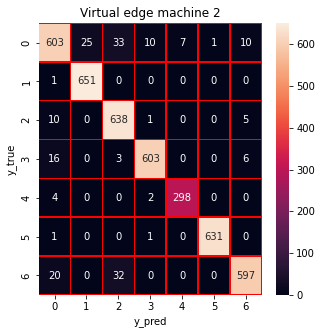

In [ ]:
# Split the data into a training and test set for edge2 dataset
X_train_edge2, X_test_edge2, y_train_edge2, y_test_edge2 = train_test_split(X_edge2, y_edge2, test_size=0.2)
y_train_edge2 = y_train_edge2.ravel()
y_test_edge2 = y_test_edge2.ravel()

# Train a local model using the training data
model = cbt.CatBoostClassifier(iterations=50, learning_rate=0.5)
model.fit(X_train_edge2, y_train_edge2)

# Predict test set results
y_pred_edge2 = model.predict(X_test_edge2)

# create and print the confusion matrix
conf_matrix_edge2 = confusion_matrix(y_test_edge2, y_pred_edge2)
print("Confusion matrix for Edge Device 2:\n", conf_matrix_edge2)

# Save the model as a pickle file
with open('local_model_edge2.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge2,y_pred_edge2))
normal_edge2_acc  = accuracy_score(y_test_edge2, y_pred_edge2)

cm=confusion_matrix(y_test_edge2,y_pred_edge2)
f,ax=plt.subplots(figsize=(5,5))
#et_f1=f1_score(y_test_edge2, y_pred_edge2, average=None)
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Virtual edge machine 2")
plt.show()

Streaming output truncated to the last 5000 lines.
174:	learn: 0.1297373	total: 6.44s	remaining: 920ms
175:	learn: 0.1295039	total: 6.46s	remaining: 882ms
176:	learn: 0.1291260	total: 6.49s	remaining: 844ms
177:	learn: 0.1290351	total: 6.51s	remaining: 805ms
178:	learn: 0.1288664	total: 6.54s	remaining: 768ms
179:	learn: 0.1284999	total: 6.57s	remaining: 730ms
180:	learn: 0.1283837	total: 6.6s	remaining: 693ms
181:	learn: 0.1282653	total: 6.62s	remaining: 655ms
182:	learn: 0.1281186	total: 6.65s	remaining: 618ms
183:	learn: 0.1279950	total: 6.68s	remaining: 581ms
184:	learn: 0.1277122	total: 6.7s	remaining: 544ms
185:	learn: 0.1275874	total: 6.73s	remaining: 507ms
186:	learn: 0.1274728	total: 6.77s	remaining: 470ms
187:	learn: 0.1273042	total: 6.79s	remaining: 434ms
188:	learn: 0.1271528	total: 6.82s	remaining: 397ms
189:	learn: 0.1270426	total: 6.85s	remaining: 360ms
190:	learn: 0.1269283	total: 6.87s	remaining: 324ms
191:	learn: 0.1267705	total: 6.9s	remaining: 287ms
192:	learn: 0.12

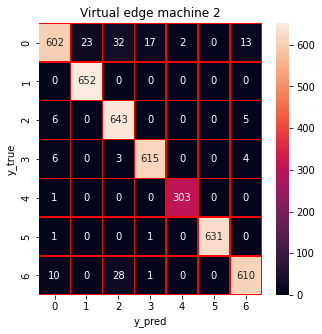

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import seaborn as sns
import matplotlib.pyplot as plt



# Create a CatBoostClassifier
model = CatBoostClassifier()

# Define the grid of hyperparameters to search
param_grid = {'depth': [3, 4, 5, 6, 7],
              'iterations': [50, 100, 200],
              'learning_rate': [0.1, 0.5, 1]}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=3)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_edge1,y_train_edge1)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Get the best estimator
best_model = grid_search.best_estimator_

# Predict test set results
y_pred_edge2 = best_model.predict(X_test_edge2)

# create and print the confusion matrix
conf_matrix_edge2 = confusion_matrix(y_test_edge2, y_pred_edge2)
print("Confusion matrix for Edge Device 1:\n", conf_matrix_edge2)

# Save the model as a pickle file
with open('local_model_edge2.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge2,y_pred_edge2))
edge2_acc  = accuracy_score(y_test_edge2, y_pred_edge2)
cm=confusion_matrix(y_test_edge2,y_pred_edge2)
f,ax=plt.subplots(figsize=(5,5))

sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Virtual edge machine 2")
plt.show()

In [ ]:
#Compare the accuracy of the three systems
print("Accuracy of Normal Edge 2: ", normal_edge2_acc)
print("Accuracy of Hyper Parameter tuned Edge 2: ", edge2_acc)

Accuracy of Normal Edge 2:  0.9553338085055832
Accuracy of Hyper Parameter tuned Edge 2:  0.9636493228795439


## Preparing Central Server's Dataset:

In [ ]:
X_train_Central, X_test_Central, y_train_Central, y_test_Central = train_test_split(X_central, y_central, test_size=0.2)

# Central Server:
A central server is a key component in Federated Learning. It acts as a hub that aggregates the updates from multiple edge devices and uses them to improve the overall model. The central server is responsible for coordinating the training process and managing the communication between edge devices.

The central server receives the model updates from edge devices, which are trained on their local data, and uses them to update the global model. This process is called model averaging, where the central server takes the average of all the updates received from the edge devices to improve the global model. The central server can also use other techniques to aggregate the updates such as weight averaging or voting.

The central server also plays a crucial role in maintaining the security and privacy of the data. It acts as a gatekeeper for the edge devices and controls the access to the data. It also ensures that the edge devices are compliant with the security protocols.

In summary, the central server is responsible for coordinating and managing the training process in Federated Learning, by aggregating the updates from multiple edge devices, maintaining the security and privacy of the data and controlling the access to the data. It plays a crucial role in the deployment of Federated Learning systems.

> Code For Central Server:

Learning rate set to 0.091382
0:	learn: 1.5968746	total: 21.8ms	remaining: 21.7s
1:	learn: 1.3766008	total: 42.1ms	remaining: 21s
2:	learn: 1.2179656	total: 66.4ms	remaining: 22.1s
3:	learn: 1.1070655	total: 107ms	remaining: 26.7s
4:	learn: 1.0074618	total: 150ms	remaining: 29.8s
5:	learn: 0.9257164	total: 184ms	remaining: 30.4s
6:	learn: 0.8595900	total: 221ms	remaining: 31.4s
7:	learn: 0.7958527	total: 258ms	remaining: 32s
8:	learn: 0.7508960	total: 296ms	remaining: 32.5s
9:	learn: 0.7076086	total: 331ms	remaining: 32.7s
10:	learn: 0.6701218	total: 367ms	remaining: 33s
11:	learn: 0.6340275	total: 403ms	remaining: 33.2s
12:	learn: 0.6038671	total: 444ms	remaining: 33.7s
13:	learn: 0.5791620	total: 478ms	remaining: 33.6s
14:	learn: 0.5509098	total: 514ms	remaining: 33.8s
15:	learn: 0.5285395	total: 550ms	remaining: 33.8s
16:	learn: 0.5085827	total: 584ms	remaining: 33.8s
17:	learn: 0.4835880	total: 633ms	remaining: 34.5s
18:	learn: 0.4724486	total: 672ms	remaining: 34.7s
19:	learn: 0.4

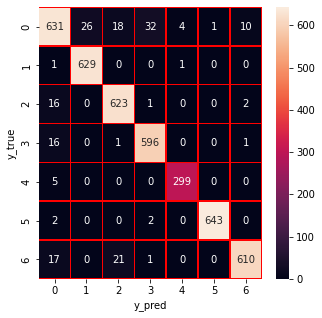

In [ ]:
from sklearn.ensemble import BaggingClassifier

# Load the models
with open('advanced_local_model_edge1.pickle', 'rb') as f:
    model_edge1 = pickle.load(f)
with open('local_model_edge2.pickle', 'rb') as f:
    model_edge2 = pickle.load(f)

# Ensemble the models to create a global model using BaggingClassifier
global_model = BaggingClassifier(base_estimator=model_edge1, n_estimators=2)
global_model.estimators_ = [model_edge1, model_edge2]

global_model.fit(X_train_Central, y_train_Central)

# Predict the test set results using the corresponding central dataset
y_pred = global_model.predict(X_test_Central)

# Create and print the confusion matrix
conf_matrix = confusion_matrix(y_test_Central, y_pred)
print("Confusion matrix for Central Server:\n", conf_matrix)
# Save the global model as a pickle file
with open('global_model.pickle', 'wb') as f:
    pickle.dump(global_model, f)
central_acc = accuracy_score(y_test_Central, y_pred)

print(classification_report(y_test_Central,y_pred))
cm=confusion_matrix(y_test_Central,y_pred)
f,ax=plt.subplots(figsize=(5,5))
#et_f1=f1_score(y_test_Central, y_pred, average=None)
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Analysis of the models:
Accuracy is a commonly used metric to evaluate the performance of machine learning models. In Federated Learning, the accuracy of the three systems, Edge Device 1, Edge Device 2 and the central server, can be used to evaluate the performance of the overall system.

The accuracy of the Edge Devices can be calculated by comparing the predictions made by the local models trained on the edge devices with the true labels of the test data. Similarly, the accuracy of the central server can be calculated by comparing the predictions made by the global model with the true labels of the test data.

A high accuracy for the Edge Devices and the central server indicates that the models are able to correctly classify the test data, and therefore have a good performance. However, it is also important to consider other evaluation metrics such as precision, recall, and F1-score, to get a more comprehensive understanding of the performance of the models.

Comparing the accuracy of the three systems can help to evaluate the performance of the overall system and identify potential issues such as overfitting or bias. It also can be used to evaluate the effect of different configurations and techniques used in Federated Learning such as data sampling, data aggregation, and model averaging on the performance of the system.

In [ ]:
#Compare the accuracy of the three systems
print("Accuracy of Edge Device 1: ", edge1_acc)
print("Accuracy of Edge Device 2: ", edge2_acc)
print("Accuracy of Central Server: ", central_acc)

Accuracy of Edge Device 1:  0.9623778596922357
Accuracy of Edge Device 2:  0.9636493228795439
Accuracy of Central Server:  0.9577096697552863


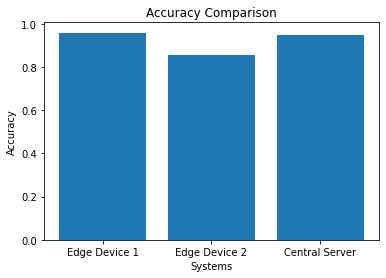

In [ ]:
systems = ['Edge Device 1', 'Edge Device 2', 'Central Server']
accuracies = [normal_edge1_acc, normal_edge2_acc, central_acc]

plt.bar(systems, accuracies)
plt.xlabel('Systems')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()

In [ ]:
# Find the system with the highest accuracy
best_system = max(edge1_acc, edge2_acc, central_acc)

if best_system == edge1_acc:
    # Save the model from Edge Device 1 as the new model file
    with open("Distribution_model.pkl", "wb") as file:
        pickle.dump(model_edge1, file)
elif best_system == edge2_acc:
    # Save the model from Edge Device 2 as the new model file
    with open("Distribution_model.pkl", "wb") as file:
        pickle.dump(model_edge2, file)
else:
    # Save the model from the Central Server as the new model file
    with open("Distribution_model.pkl", "wb") as file:
        pickle.dump(global_model, file)


In conclusion, Federated Learning is a powerful method for training machine learning models that allows for large and diverse datasets to be used without compromising the privacy of users. The three main components of Federated Learning are edge devices, central servers, and virtual edge devices. Edge devices are responsible for training local models using their own data, central servers aggregate updates from the edge devices to improve the global model, and virtual edge devices are used to simulate and test the behavior of edge devices in a controlled environment. Accuracies of the three systems are important metric to evaluate the performance of the overall system.

# Best Edge Device Models 

In [ ]:
# Split the data into a training and test set for edge1 dataset
X_train_edge1, X_test_edge1, y_train_edge1, y_test_edge1 = train_test_split(X_edge1, y_edge1, test_size=0.2)
y_train_edge1 = y_train_edge1.ravel()
y_test_edge1 = y_test_edge1.ravel()


# Train a local model using the training data
model = cbt.CatBoostClassifier(depth = 5, iterations = 200, learning_rate = 0.5)
model.fit(X_train_edge1, y_train_edge1)

# Predict test set results
y_pred_edge1 = model.predict(X_test_edge1)

# create and print the confusion matrix
conf_matrix_edge1 = confusion_matrix(y_test_edge1, y_pred_edge1)
print("Confusion matrix for Edge Device 1:\n", conf_matrix_edge1)

# Save the model as a pickle file
with open('wil_model_edge1.pickle', 'wb') as f:
    pickle.dump(model, f)

0:	learn: 0.8127783	total: 76.9ms	remaining: 15.3s
1:	learn: 0.5692611	total: 156ms	remaining: 15.4s
2:	learn: 0.4825984	total: 229ms	remaining: 15s
3:	learn: 0.3824617	total: 334ms	remaining: 16.4s
4:	learn: 0.3400781	total: 407ms	remaining: 15.9s
5:	learn: 0.3239525	total: 475ms	remaining: 15.4s
6:	learn: 0.2765988	total: 563ms	remaining: 15.5s
7:	learn: 0.2585277	total: 629ms	remaining: 15.1s
8:	learn: 0.2428468	total: 705ms	remaining: 15s
9:	learn: 0.2341934	total: 761ms	remaining: 14.5s
10:	learn: 0.2177330	total: 831ms	remaining: 14.3s
11:	learn: 0.2057025	total: 885ms	remaining: 13.9s
12:	learn: 0.1947921	total: 929ms	remaining: 13.4s
13:	learn: 0.1882288	total: 995ms	remaining: 13.2s
14:	learn: 0.1860297	total: 1.06s	remaining: 13.1s
15:	learn: 0.1820647	total: 1.12s	remaining: 12.9s
16:	learn: 0.1761461	total: 1.17s	remaining: 12.6s
17:	learn: 0.1700351	total: 1.25s	remaining: 12.7s
18:	learn: 0.1626394	total: 1.3s	remaining: 12.4s
19:	learn: 0.1602590	total: 1.33s	remaining: 

In [ ]:
# Split the data into a training and test set for edge2 dataset
X_train_edge2, X_test_edge2, y_train_edge2, y_test_edge2 = train_test_split(X_edge2, y_edge2, test_size=0.2)
y_train_edge2 = y_train_edge2.ravel()
y_test_edge2 = y_test_edge2.ravel()

# Train a local model using the training data
model = cbt.CatBoostClassifier(depth = 5, iterations = 200, learning_rate = 0.5)
model.fit(X_train_edge2, y_train_edge2)

# Predict test set results
y_pred_edge2 = model.predict(X_test_edge2)

# create and print the confusion matrix
conf_matrix_edge2 = confusion_matrix(y_test_edge2, y_pred_edge2)
print("Confusion matrix for Edge Device 2:\n", conf_matrix_edge2)

# Save the model as a pickle file
with open('wil_model_edge2.pickle', 'wb') as f:
    pickle.dump(model, f)


0:	learn: 0.8036287	total: 10.4ms	remaining: 2.07s
1:	learn: 0.5773783	total: 21.5ms	remaining: 2.13s
2:	learn: 0.5096538	total: 31.3ms	remaining: 2.05s
3:	learn: 0.4114538	total: 41.9ms	remaining: 2.05s
4:	learn: 0.3651126	total: 52ms	remaining: 2.03s
5:	learn: 0.3386959	total: 61.7ms	remaining: 2s
6:	learn: 0.2945095	total: 77.6ms	remaining: 2.14s
7:	learn: 0.2824362	total: 97ms	remaining: 2.33s
8:	learn: 0.2705113	total: 107ms	remaining: 2.27s
9:	learn: 0.2453695	total: 118ms	remaining: 2.24s
10:	learn: 0.2297692	total: 129ms	remaining: 2.21s
11:	learn: 0.2197886	total: 140ms	remaining: 2.19s
12:	learn: 0.2154233	total: 150ms	remaining: 2.15s
13:	learn: 0.2071210	total: 161ms	remaining: 2.14s
14:	learn: 0.1981218	total: 171ms	remaining: 2.11s
15:	learn: 0.1929064	total: 181ms	remaining: 2.08s
16:	learn: 0.1893853	total: 192ms	remaining: 2.06s
17:	learn: 0.1839840	total: 202ms	remaining: 2.04s
18:	learn: 0.1816326	total: 214ms	remaining: 2.04s
19:	learn: 0.1782653	total: 225ms	remain

# On KD-99 DataSet


In [ ]:
import pandas as pd
from tensorflow.keras.utils import get_file
path= "/content/drive/MyDrive/ISM/kddcup.data_10_percent_corrected"
df = pd.read_csv(path, header=None)

In [ ]:
# The CSV file has no column heads, so add them
df.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome'
]



Analysing the Dataset

In [ ]:
print("Read {} rows.".format(len(df)))
print('='*40)
print('The number of data points are:', df.shape[0])
print('='*40)
print('The number of features are:', df.shape[1])
print('='*40)
output = df['outcome'].values
labels = set(output)
print('The different type of output labels are:', labels)
print('='*125)
print('The number of different output labels are:', len(labels))

Read 494021 rows.
The number of data points are: 494021
The number of features are: 42
The different type of output labels are: {'ftp_write.', 'imap.', 'spy.', 'nmap.', 'neptune.', 'multihop.', 'smurf.', 'normal.', 'warezmaster.', 'ipsweep.', 'back.', 'buffer_overflow.', 'phf.', 'rootkit.', 'guess_passwd.', 'teardrop.', 'warezclient.', 'satan.', 'loadmodule.', 'pod.', 'portsweep.', 'land.', 'perl.'}
The number of different output labels are: 23


In [ ]:
df=df[['src_bytes', 'dst_bytes', 'num_failed_logins', 'root_shell', 'dst_host_srv_count', 'outcome']]
df = df[df['outcome']!=' ']
df.dropna()
#df.replace([np.inf, -df.np.inf], np.nan, inplace=True)
# Divide the data into three parts
X = df.drop('outcome', axis=1)
y = df['outcome']

In [ ]:
df.outcome.value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: outcome, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
# Create an instance of the SMOTE class
#smote = SMOTE(sampling_strategy='minority', k_neighbors=1)
smote=SMOTE(n_jobs=-1,sampling_strategy={"spy.":3000,"perl.":3000,"phf.":3000,"multihop.":3000,"ftp_write.":3000,"loadmodule.":3000,"rootkit.":3000,"imap.":3000,"warezmaster.":3000,"warezmaster.":3000,"land.":3000,"buffer_overflow.":3000,"guess_passwd.":3000,"nmap.":3000,"pod.":3000,"teardrop.":3000,"warezclient.":3000,"portsweep.":3000,"ipsweep.":3000,"satan.":3000,"back.":3000},k_neighbors=1)

In [ ]:
X, y = smote.fit_resample(X, y)

In [ ]:
pd.Series(y).value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 3000
spy.                  3000
warezclient.          3000
warezmaster.          3000
multihop.             3000
nmap.                 3000
phf.                  3000
satan.                3000
imap.                 3000
land.                 3000
ftp_write.            3000
buffer_overflow.      3000
ipsweep.              3000
portsweep.            3000
teardrop.             3000
pod.                  3000
guess_passwd.         3000
perl.                 3000
loadmodule.           3000
rootkit.              3000
Name: outcome, dtype: int64

In [ ]:
from sklearn.ensemble import IsolationForest

# fit the model
clf = IsolationForest(max_samples=100, random_state=42, contamination=0.1)
clf.fit(X)

# get the outlier indices
outlier_indices = clf.predict(X)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
# remove the outliers
X = X[outlier_indices == 1]
y = y[outlier_indices == 1]

In [ ]:
pd.Series(y).value_counts()

smurf.              280790
neptune.            107201
normal.              73274
teardrop.             3000
land.                 3000
satan.                2997
portsweep.            2996
ipsweep.              2974
nmap.                 2958
imap.                 2470
ftp_write.            2188
warezclient.          1823
rootkit.              1823
loadmodule.           1520
multihop.             1300
warezmaster.           319
buffer_overflow.        60
pod.                    52
Name: outcome, dtype: int64

In [ ]:
X_edge1, X_edge2, y_edge1, y_edge2 = train_test_split(X, y, test_size=0.33, random_state=42)
X_central, X_edge2, y_central, y_edge2 = train_test_split(X_edge2, y_edge2, test_size=0.50, random_state=42)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

0:	learn: 1.5622485	total: 987ms	remaining: 48.4s
1:	learn: 1.2958375	total: 1.27s	remaining: 30.4s
2:	learn: 1.1224388	total: 1.52s	remaining: 23.8s
3:	learn: 0.9949092	total: 1.84s	remaining: 21.2s
4:	learn: 0.8931292	total: 2.27s	remaining: 20.4s
5:	learn: 0.8105859	total: 2.63s	remaining: 19.3s
6:	learn: 0.7436239	total: 3.14s	remaining: 19.3s
7:	learn: 0.6876521	total: 4.36s	remaining: 22.9s
8:	learn: 0.6394448	total: 4.74s	remaining: 21.6s
9:	learn: 0.5989505	total: 5.24s	remaining: 21s
10:	learn: 0.5639373	total: 5.64s	remaining: 20s
11:	learn: 0.5332091	total: 6.03s	remaining: 19.1s
12:	learn: 0.5068202	total: 6.4s	remaining: 18.2s
13:	learn: 0.4826174	total: 6.66s	remaining: 17.1s
14:	learn: 0.4616090	total: 6.92s	remaining: 16.2s
15:	learn: 0.4434497	total: 7.19s	remaining: 15.3s
16:	learn: 0.4262410	total: 7.47s	remaining: 14.5s
17:	learn: 0.4064486	total: 7.75s	remaining: 13.8s
18:	learn: 0.3885053	total: 8.01s	remaining: 13.1s
19:	learn: 0.3682889	total: 8.27s	remaining: 1

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

buffer_overflow.       0.00      0.00      0.00         6
      ftp_write.       0.92      0.65      0.76       299
           imap.       0.00      0.00      0.00       354
        ipsweep.       0.00      0.00      0.00       387
           land.       0.00      0.00      0.00       401
     loadmodule.       0.91      0.46      0.61       230
       multihop.       0.88      0.72      0.79       179
        neptune.       0.88      1.00      0.94     14296
           nmap.       0.00      0.00      0.00       411
         normal.       0.90      0.97      0.93      9904
            pod.       0.00      0.00      0.00         8
      portsweep.       0.00      0.00      0.00       424
        rootkit.       0.88      0.92      0.90       251
          satan.       0.70      0.02      0.04       381
          smurf.       0.99      1.00      1.00     37528
       teardrop.       1.00      0.99      1.00       403
    warezclie

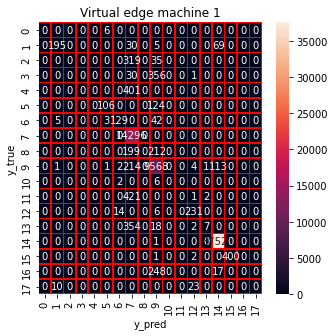

In [ ]:
# Split the data into a training and test set for edge1 dataset
X_train_edge1, X_test_edge1, y_train_edge1, y_test_edge1 = train_test_split(X_edge1, y_edge1, test_size=0.2)
y_train_edge1 = y_train_edge1.ravel()
y_test_edge1 = y_test_edge1.ravel()


# Train a local model using the training data
model = cbt.CatBoostClassifier(iterations=50, depth=2, learning_rate=0.1)
model.fit(X_train_edge1, y_train_edge1)

# Predict test set results
y_pred_edge1 = model.predict(X_test_edge1)

# create and print the confusion matrix
conf_matrix_edge1 = confusion_matrix(y_test_edge1, y_pred_edge1)
print("Confusion matrix for Edge Device 1:\n", conf_matrix_edge1)

# Save the model as a pickle file
with open('local_model_edge1.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge1,y_pred_edge1))
normal_edge1_acc  = accuracy_score(y_test_edge1, y_pred_edge1)
cm=confusion_matrix(y_test_edge1,y_pred_edge1)
f,ax=plt.subplots(figsize=(5,5))

sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Virtual edge machine 1")
plt.show()

0:	learn: 1.5815120	total: 159ms	remaining: 7.79s
1:	learn: 1.3097136	total: 288ms	remaining: 6.92s
2:	learn: 1.1313480	total: 500ms	remaining: 7.84s
3:	learn: 0.9993775	total: 623ms	remaining: 7.17s
4:	learn: 0.8966057	total: 757ms	remaining: 6.81s
5:	learn: 0.8152989	total: 880ms	remaining: 6.45s
6:	learn: 0.7465130	total: 966ms	remaining: 5.93s
7:	learn: 0.6877543	total: 1.08s	remaining: 5.67s
8:	learn: 0.6392093	total: 1.2s	remaining: 5.49s
9:	learn: 0.5964855	total: 1.33s	remaining: 5.33s
10:	learn: 0.5607783	total: 1.45s	remaining: 5.13s
11:	learn: 0.5289773	total: 1.57s	remaining: 4.98s
12:	learn: 0.5022218	total: 1.68s	remaining: 4.77s
13:	learn: 0.4781348	total: 1.8s	remaining: 4.63s
14:	learn: 0.4566945	total: 1.88s	remaining: 4.4s
15:	learn: 0.4345428	total: 1.98s	remaining: 4.21s
16:	learn: 0.4114235	total: 2.08s	remaining: 4.04s
17:	learn: 0.3931180	total: 2.14s	remaining: 3.81s
18:	learn: 0.3725731	total: 2.2s	remaining: 3.6s
19:	learn: 0.3557976	total: 2.27s	remaining: 3

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

  ftp_write.       0.91      0.27      0.42        78
       imap.       0.00      0.00      0.00        82
    ipsweep.       0.48      0.20      0.29        74
       land.       0.00      0.00      0.00        95
 loadmodule.       0.95      0.78      0.86        51
   multihop.       0.45      0.68      0.54        37
    neptune.       0.88      1.00      0.94      3505
       nmap.       0.00      0.00      0.00        67
     normal.       0.92      0.98      0.95      2473
        pod.       0.00      0.00      0.00         2
  portsweep.       0.00      0.00      0.00        99
    rootkit.       0.72      0.38      0.49        48
      satan.       0.00      0.00      0.00        97
      smurf.       0.99      1.00      1.00      9329
   teardrop.       1.00      0.67      0.80        85
warezclient.       0.00      0.00      0.00        63
warezmaster.       0.00      0.00      0.00        10

    accuracy              

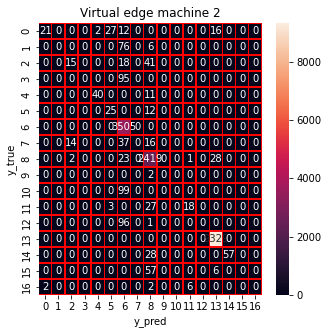

In [ ]:
# Split the data into a training and test set for edge2 dataset
X_train_edge2, X_test_edge2, y_train_edge2, y_test_edge2 = train_test_split(X_edge2, y_edge2, test_size=0.2)
y_train_edge2 = y_train_edge2.ravel()
y_test_edge2 = y_test_edge2.ravel()

# Train a local model using the training data
model = cbt.CatBoostClassifier(iterations=50, depth=2, learning_rate=0.1)
model.fit(X_train_edge2, y_train_edge2)

# Predict test set results
y_pred_edge2 = model.predict(X_test_edge2)

# create and print the confusion matrix
conf_matrix_edge2 = confusion_matrix(y_test_edge2, y_pred_edge2)
print("Confusion matrix for Edge Device 2:\n", conf_matrix_edge2)

# Save the model as a pickle file
with open('local_model_edge2.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge2,y_pred_edge2))
normal_edge2_acc  = accuracy_score(y_test_edge2, y_pred_edge2)

cm=confusion_matrix(y_test_edge2,y_pred_edge2)
f,ax=plt.subplots(figsize=(5,5))
#et_f1=f1_score(y_test_edge2, y_pred_edge2, average=None)
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Virtual edge machine 2")
plt.show()

In [ ]:
X_train_Central, X_test_Central, y_train_Central, y_test_Central = train_test_split(X_central, y_central, test_size=0.2)

0:	learn: 1.5858677	total: 191ms	remaining: 9.35s
1:	learn: 1.3150072	total: 311ms	remaining: 7.47s
2:	learn: 1.1371236	total: 433ms	remaining: 6.78s
3:	learn: 1.0056583	total: 617ms	remaining: 7.1s
4:	learn: 0.9032328	total: 828ms	remaining: 7.45s
5:	learn: 0.8220597	total: 1.11s	remaining: 8.15s
6:	learn: 0.7537190	total: 1.49s	remaining: 9.14s
7:	learn: 0.6947011	total: 1.91s	remaining: 10s
8:	learn: 0.6462378	total: 2.29s	remaining: 10.4s
9:	learn: 0.6041616	total: 2.63s	remaining: 10.5s
10:	learn: 0.5689808	total: 2.85s	remaining: 10.1s
11:	learn: 0.5374859	total: 3.01s	remaining: 9.54s
12:	learn: 0.5103823	total: 3.19s	remaining: 9.06s
13:	learn: 0.4859829	total: 3.38s	remaining: 8.71s
14:	learn: 0.4641618	total: 3.54s	remaining: 8.26s
15:	learn: 0.4450567	total: 3.7s	remaining: 7.85s
16:	learn: 0.4243907	total: 3.82s	remaining: 7.41s
17:	learn: 0.4083194	total: 3.89s	remaining: 6.92s
18:	learn: 0.3880602	total: 3.96s	remaining: 6.46s
19:	learn: 0.3713884	total: 4.02s	remaining: 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

buffer_overflow.       0.00      0.00      0.00         2
      ftp_write.       0.79      0.23      0.36        65
           imap.       0.00      0.00      0.00        76
        ipsweep.       0.28      0.09      0.14        95
           land.       0.00      0.00      0.00        89
     loadmodule.       0.75      0.47      0.58        45
       multihop.       1.00      0.07      0.12        46
        neptune.       0.88      1.00      0.94      3597
           nmap.       0.00      0.00      0.00       100
         normal.       0.88      0.97      0.92      2396
            pod.       0.00      0.00      0.00         3
      portsweep.       0.00      0.00      0.00       101
        rootkit.       0.77      0.42      0.54        65
          satan.       0.00      0.00      0.00        96
          smurf.       0.99      1.00      1.00      9240
       teardrop.       1.00      0.87      0.93       101
    warezclie

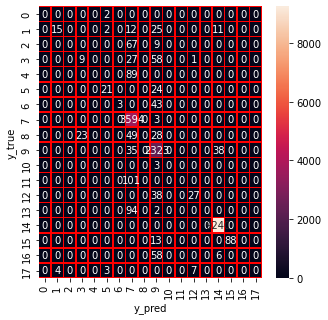

In [ ]:
from sklearn.ensemble import BaggingClassifier

# Load the models
with open('local_model_edge1.pickle', 'rb') as f:
    model_edge1 = pickle.load(f)
with open('local_model_edge2.pickle', 'rb') as f:
    model_edge2 = pickle.load(f)

# Ensemble the models to create a global model using BaggingClassifier
global_model = BaggingClassifier(base_estimator=model_edge1, n_estimators=2)
global_model.estimators_ = [model_edge1, model_edge2]

global_model.fit(X_train_Central, y_train_Central)

# Predict the test set results using the corresponding central dataset
y_pred = global_model.predict(X_test_Central)

# Create and print the confusion matrix
conf_matrix = confusion_matrix(y_test_Central, y_pred)
print("Confusion matrix for Central Server:\n", conf_matrix)
# Save the global model as a pickle file
with open('global_model.pickle', 'wb') as f:
    pickle.dump(global_model, f)
central_acc = accuracy_score(y_test_Central, y_pred)

print(classification_report(y_test_Central,y_pred))
cm=confusion_matrix(y_test_Central,y_pred)
f,ax=plt.subplots(figsize=(5,5))
#et_f1=f1_score(y_test_Central, y_pred, average=None)
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

0.9498023114355231 0.9527014510651436 0.9459709786971288


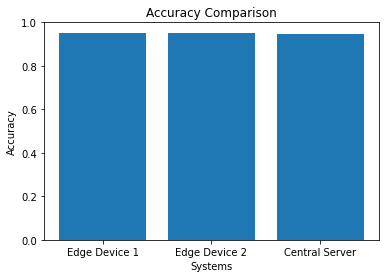

In [ ]:
systems = ['Edge Device 1', 'Edge Device 2', 'Central Server']
accuracies = [normal_edge1_acc, normal_edge2_acc, central_acc]
print(normal_edge1_acc, normal_edge2_acc, central_acc)
plt.bar(systems, accuracies)
plt.xlabel('Systems')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()

# UNSW-NB-15 Dataset


In [ ]:
path ="/content/drive/MyDrive/ISM/UNSW_NB15_training-set.csv"
df = pd.read_csv(path)

In [ ]:
print("Read {} rows.".format(len(df)))
print('='*40)
print('The number of data points are:', df.shape[0])
print('='*40)
print('The number of features are:', df.shape[1])
print('='*40)
output = df['attack_cat'].values
labels = set(output)
print('The different type of output labels are:', labels)
print('='*125)
print('The number of different output labels are:', len(labels))

Read 82332 rows.
The number of data points are: 82332
The number of features are: 45
The different type of output labels are: {'Generic', 'Reconnaissance', 'Normal', 'Worms', 'Analysis', 'Fuzzers', 'DoS', 'Backdoor', 'Shellcode', 'Exploits'}
The number of different output labels are: 10


In [ ]:
# Data Cleaning

# Checking for NULL values
print('Null values in dataset are',len(df[df.isnull().any(1)]))
print('='*40)

# Checkng for DUPLICATE values
df.drop_duplicates(keep='first', inplace = True)

# For now, just drop NA's (rows with missing values)
df.dropna(inplace=True,axis=1) 

# stored the data into a pickle file so we can load through
df.to_pickle('df.pkl')

print("Read {} rows.".format(len(df)))

Null values in dataset are 0
Read 82332 rows.


In [ ]:
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [ ]:
df=df[['spkts', 'dpkts', 'sbytes', 'rate', 'dbytes', 'attack_cat']]
df = df[df['attack_cat']!=' ']
df.dropna()
#df.replace([np.inf, -df.np.inf], np.nan, inplace=True)
# Divide the data into three parts
X = df.drop('attack_cat', axis=1)
y = df['attack_cat']

In [ ]:
df.attack_cat.value_counts()

Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
# Create an instance of the SMOTE class
#smote = SMOTE(sampling_strategy='minority', k_neighbors=1)
smote=SMOTE(n_jobs=-1,sampling_strategy={"Worms":20000,"Shellcode":20000,"Backdoor":20000,"Analysis":20000,"Reconnaissance":20000,"DoS":20000,"Exploits":20000,"Generic":20000},k_neighbors=1)

In [ ]:
X, y = smote.fit_resample(X, y)

In [ ]:
pd.Series(y).value_counts()

Normal            37000
Reconnaissance    20000
Backdoor          20000
DoS               20000
Exploits          20000
Analysis          20000
Worms             20000
Shellcode         20000
Generic           20000
Fuzzers            6062
Name: attack_cat, dtype: int64

In [ ]:
from sklearn.ensemble import IsolationForest

# fit the model
clf = IsolationForest(max_samples=100, random_state=42, contamination=0.1)
clf.fit(X)

# get the outlier indices
outlier_indices = clf.predict(X)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
# remove the outliers
X = X[outlier_indices == 1]
y = y[outlier_indices == 1]

In [ ]:
pd.Series(y).value_counts()

Normal            29154
Analysis          19562
Reconnaissance    19539
Shellcode         19529
Backdoor          19287
Generic           19244
DoS               18171
Worms             16888
Exploits          15852
Fuzzers            5544
Name: attack_cat, dtype: int64

In [ ]:
X_edge1, X_edge2, y_edge1, y_edge2 = train_test_split(X, y, test_size=0.33, random_state=42)
X_central, X_edge2, y_central, y_edge2 = train_test_split(X_edge2, y_edge2, test_size=0.50, random_state=42)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

0:	learn: 1.5920399	total: 131ms	remaining: 26s
1:	learn: 1.4334031	total: 198ms	remaining: 19.6s
2:	learn: 1.3107264	total: 258ms	remaining: 16.9s
3:	learn: 1.2310251	total: 318ms	remaining: 15.6s
4:	learn: 1.1738143	total: 386ms	remaining: 15s
5:	learn: 1.1421084	total: 461ms	remaining: 14.9s
6:	learn: 1.1172481	total: 516ms	remaining: 14.2s
7:	learn: 1.0864651	total: 576ms	remaining: 13.8s
8:	learn: 1.0478798	total: 639ms	remaining: 13.6s
9:	learn: 1.0235764	total: 710ms	remaining: 13.5s
10:	learn: 1.0099680	total: 781ms	remaining: 13.4s
11:	learn: 0.9949370	total: 840ms	remaining: 13.2s
12:	learn: 0.9773764	total: 906ms	remaining: 13s
13:	learn: 0.9684667	total: 967ms	remaining: 12.8s
14:	learn: 0.9602861	total: 1.02s	remaining: 12.6s
15:	learn: 0.9439155	total: 1.08s	remaining: 12.5s
16:	learn: 0.9343664	total: 1.15s	remaining: 12.3s
17:	learn: 0.9189648	total: 1.21s	remaining: 12.2s
18:	learn: 0.9130882	total: 1.26s	remaining: 12s
19:	learn: 0.9006947	total: 1.32s	remaining: 11.9

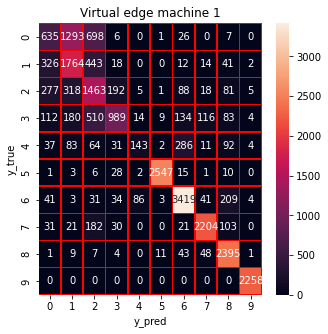

In [ ]:
# Split the data into a training and test set for edge1 dataset
X_train_edge1, X_test_edge1, y_train_edge1, y_test_edge1 = train_test_split(X_edge1, y_edge1, test_size=0.2)
y_train_edge1 = y_train_edge1.ravel()
y_test_edge1 = y_test_edge1.ravel()


# Train a local model using the training data
model = cbt.CatBoostClassifier(depth = 5, iterations = 200, learning_rate = 0.5)
model.fit(X_train_edge1, y_train_edge1)

# Predict test set results
y_pred_edge1 = model.predict(X_test_edge1)

# create and print the confusion matrix
conf_matrix_edge1 = confusion_matrix(y_test_edge1, y_pred_edge1)
print("Confusion matrix for Edge Device 1:\n", conf_matrix_edge1)

# Save the model as a pickle file
with open('local_model_edge1.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge1,y_pred_edge1))
normal_edge1_acc  = accuracy_score(y_test_edge1, y_pred_edge1)
cm=confusion_matrix(y_test_edge1,y_pred_edge1)
f,ax=plt.subplots(figsize=(5,5))

sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Virtual edge machine 1")
plt.show()

0:	learn: 1.6320169	total: 38.6ms	remaining: 7.68s
1:	learn: 1.4108014	total: 90.2ms	remaining: 8.93s
2:	learn: 1.2859229	total: 144ms	remaining: 9.44s
3:	learn: 1.2311066	total: 206ms	remaining: 10.1s
4:	learn: 1.1717351	total: 265ms	remaining: 10.3s
5:	learn: 1.1203638	total: 305ms	remaining: 9.87s
6:	learn: 1.0934311	total: 348ms	remaining: 9.61s
7:	learn: 1.0706327	total: 388ms	remaining: 9.32s
8:	learn: 1.0514266	total: 444ms	remaining: 9.43s
9:	learn: 1.0351344	total: 506ms	remaining: 9.61s
10:	learn: 1.0280794	total: 562ms	remaining: 9.65s
11:	learn: 1.0037563	total: 620ms	remaining: 9.71s
12:	learn: 0.9938833	total: 681ms	remaining: 9.79s
13:	learn: 0.9844562	total: 746ms	remaining: 9.91s
14:	learn: 0.9758539	total: 805ms	remaining: 9.93s
15:	learn: 0.9725140	total: 860ms	remaining: 9.89s
16:	learn: 0.9653109	total: 909ms	remaining: 9.78s
17:	learn: 0.9570387	total: 944ms	remaining: 9.54s
18:	learn: 0.9402336	total: 989ms	remaining: 9.42s
19:	learn: 0.9308952	total: 1.03s	remai

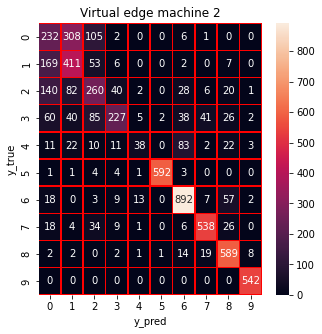

In [ ]:
# Split the data into a training and test set for edge2 dataset
X_train_edge2, X_test_edge2, y_train_edge2, y_test_edge2 = train_test_split(X_edge2, y_edge2, test_size=0.2)
y_train_edge2 = y_train_edge2.ravel()
y_test_edge2 = y_test_edge2.ravel()

# Train a local model using the training data
model = cbt.CatBoostClassifier(depth = 5, iterations = 200, learning_rate = 0.5)
model.fit(X_train_edge2, y_train_edge2)

# Predict test set results
y_pred_edge2 = model.predict(X_test_edge2)

# create and print the confusion matrix
conf_matrix_edge2 = confusion_matrix(y_test_edge2, y_pred_edge2)
print("Confusion matrix for Edge Device 2:\n", conf_matrix_edge2)

# Save the model as a pickle file
with open('local_model_edge2.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge2,y_pred_edge2))
normal_edge2_acc  = accuracy_score(y_test_edge2, y_pred_edge2)

cm=confusion_matrix(y_test_edge2,y_pred_edge2)
f,ax=plt.subplots(figsize=(5,5))
#et_f1=f1_score(y_test_edge2, y_pred_edge2, average=None)
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Virtual edge machine 2")
plt.show()

In [ ]:
X_train_Central, X_test_Central, y_train_Central, y_test_Central = train_test_split(X_central, y_central, test_size=0.2)

0:	learn: 1.6132639	total: 17.3ms	remaining: 3.43s
1:	learn: 1.4508507	total: 35.8ms	remaining: 3.54s
2:	learn: 1.3090388	total: 54.1ms	remaining: 3.55s
3:	learn: 1.2257570	total: 71.3ms	remaining: 3.49s
4:	learn: 1.1950786	total: 86.5ms	remaining: 3.37s
5:	learn: 1.1308225	total: 103ms	remaining: 3.33s
6:	learn: 1.0757274	total: 120ms	remaining: 3.32s
7:	learn: 1.0660678	total: 136ms	remaining: 3.25s
8:	learn: 1.0433841	total: 153ms	remaining: 3.24s
9:	learn: 1.0258607	total: 169ms	remaining: 3.2s
10:	learn: 1.0118237	total: 185ms	remaining: 3.18s
11:	learn: 0.9976799	total: 202ms	remaining: 3.16s
12:	learn: 0.9861613	total: 223ms	remaining: 3.21s
13:	learn: 0.9756266	total: 242ms	remaining: 3.22s
14:	learn: 0.9582995	total: 259ms	remaining: 3.19s
15:	learn: 0.9552679	total: 274ms	remaining: 3.15s
16:	learn: 0.9471594	total: 295ms	remaining: 3.17s
17:	learn: 0.9413151	total: 312ms	remaining: 3.15s
18:	learn: 0.9259575	total: 329ms	remaining: 3.13s
19:	learn: 0.9192943	total: 346ms	rem

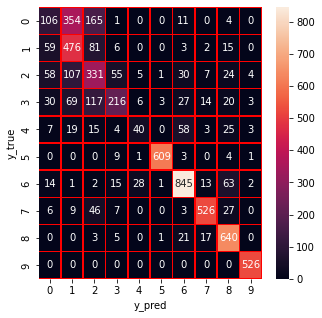

In [ ]:
from sklearn.ensemble import BaggingClassifier

# Load the models
with open('local_model_edge1.pickle', 'rb') as f:
    model_edge1 = pickle.load(f)
with open('local_model_edge2.pickle', 'rb') as f:
    model_edge2 = pickle.load(f)

# Ensemble the models to create a global model using BaggingClassifier
global_model = BaggingClassifier(base_estimator=model_edge1, n_estimators=2)
global_model.estimators_ = [model_edge1, model_edge2]

global_model.fit(X_train_Central, y_train_Central)

# Predict the test set results using the corresponding central dataset
y_pred = global_model.predict(X_test_Central)

# Create and print the confusion matrix
conf_matrix = confusion_matrix(y_test_Central, y_pred)
print("Confusion matrix for Central Server:\n", conf_matrix)
# Save the global model as a pickle file
with open('global_model.pickle', 'wb') as f:
    pickle.dump(global_model, f)
central_acc = accuracy_score(y_test_Central, y_pred)

print(classification_report(y_test_Central,y_pred))
cm=confusion_matrix(y_test_Central,y_pred)
f,ax=plt.subplots(figsize=(5,5))
#et_f1=f1_score(y_test_Central, y_pred, average=None)
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

0.7274917316565269 0.7163461538461539 0.7153514588859416


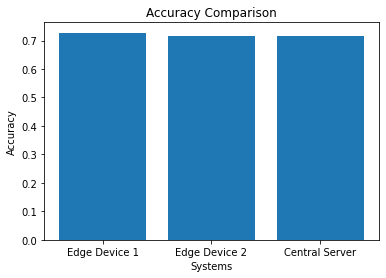

In [ ]:
systems = ['Edge Device 1', 'Edge Device 2', 'Central Server']
accuracies = [normal_edge1_acc, normal_edge2_acc, central_acc]
print(normal_edge1_acc, normal_edge2_acc, central_acc)
plt.bar(systems, accuracies)
plt.xlabel('Systems')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()